# EMA Visualization Script VENSIM Model

Date: 28-08-2017

Mark Havelaar
Wouter Jaspers

Subject: Long-term planning of large interventions within complex and dynamic infrastructure systems

Simulation:
DUO_Assetconnection (Proving importance of asset connection)

## Intervention simulation: Simulation of 1000 runs of Road and Lock. 
## Proving Importance of asset connection
## Visualize impact on Harbour, and Economy

#1 Loading EMA Workbench & Other Relevant Packages

In [35]:
from __future__ import division


import copy
from copy import deepcopy

import matplotlib.pyplot as plt
import numpy as np
import datetime
import math
import matplotlib.gridspec as gridspec
import pandas as pd
import tarfile

import seaborn as sns

import scipy.stats.kde as kde

from matplotlib.pyplot import pie
from matplotlib.ticker import FormatStrFormatter, FuncFormatter
from matplotlib.patches import ConnectionPatch
import matplotlib.font_manager as fm

from ema_workbench import (util, TimeSeriesOutcome, perform_experiments, Constant, 
                           RealParameter, ema_logging, ScalarOutcome, load_results)

from ema_workbench.util import ema_logging, debug, info, warning, EMAError

from ema_workbench.analysis.plotting_util import prepare_data, COLOR_LIST, simple_kde, group_density,\
                                                 plot_envelope, simple_density,\
                                                 do_titles, do_ylabels, TIME, ENV_LIN, ENVELOPE, LINES,\
                                                 PATCH, LINE, TIGHT, KDE, BOXPLOT, group_results

from Figures import envelopes, lines, plot_lines_with_envelopes, string_to_upper_case, change_fig_appearance
    
__all__ = ['lines', 'envelopes', 'kde_over_time', 'multiple_densities']

TIME_LABEL = 'Time'

from ema_workbench.analysis.pairs_plotting import pairs_lines, pairs_scatter, pairs_density
import ema_workbench.analysis.plotting_util as plt_util

save = True
fig_size = (10,7)
dpi = 300
%matplotlib inline

#2 Specifying WD 

In [37]:
#Working Directory for Loading Results
wd= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA'

#Working Directory for Saving Figures
wd1= r'C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\Figures'

#3 Loading Calculation File
#Road: No Intervention
#Lock: No Intervention

In [38]:
file_name = wd + '\\DUO_1000runs_SimulationFile_Road0Lock0.tar.gz'
results = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\DUO_1000runs_SimulationFile_Road0Lock0.tar.gz


#4 Getting an overview of the KPIs in the Results File

In [39]:
experiments, outcomes = results

starttime = 2017
keys = outcomes.keys()

all_KPIs = []

for key in sorted(keys):
    print(key)
    all_KPIs.append(key)

Available Area
City Population
Local Economic Growth
Local Economy
Lock System IC Factor
MTPA Distributed in Harbour
Road System IC Factor
TIME


#5 Specifying Ylabels for Graphs

In [40]:
ylabels = {}
ylabels['City Area to Total Area'] = 'City Area to Total Area (%)'
ylabels['City Population'] = 'City Population (People)'
ylabels['Constructed Business'] = 'City Businessess (Buildings)'
ylabels['Constructed Houses'] = 'City Houses (Houses)'
ylabels['Harbour Area to Total Area'] = 'Harbour area to Total Area (%)'
ylabels['MTPA Distributed in Harbour'] = 'Harbour Distribution (MTPA/Year)'
ylabels['Local Economic Growth'] = 'Local Economic Growth (%)'
ylabels['Local Economy'] = 'Local Economy (Euros)'
ylabels['Total Constructed area to total area'] = 'Total Constructed Area to Total Area (%)'
ylabels['Lock System IC Factor'] = 'Lock System IC Factor (%)'
ylabels['Sell By Date of Door Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock Remaining Parts Height'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Lock System Policy IC Factor'] = 'Sell By Date (Year)'
ylabels['Road System IC Factor'] = 'Road System IC Factor (%)'
ylabels['Sell By Date for the Sewer System'] = 'Sell By Date (Year)'
ylabels['Sell By Date of Road System Policy'] = 'Sell By Date (Year)'
ylabels['Jobs'] = 'Jobs (Jobs)'
ylabels['Available Area'] = 'Available Area (ha)'
ylabels['Sell By Date of the Road System Policy'] = 'Sell By Date (Year)'

#6 Specifying Categories Labels per Scenario

In [41]:
#Switch Population
Categories_labels_pop = ['Low Population', 'Medium Population', 'High Population']
#Switch Urbanization
Categories_labels_urb = ['Low Urbanization', 'Medium Urbanization', 'High Urbanization']
#Switch Economy
Categories_labels_eco = ['Low Economic Growth', 'Medium Economic Growth',  'High Economic Growth']
#Switch Climate Scenario
Categories_labels_climate = ['GL Scenario', 'GH Scenario', 'WL Scenario', 'WH Scenario']
#Switch Innovation
Categories_labels_inno = ['Low Innovation', 'Medium Innovation', 'High Innovation']
#Switch Connected and Unconnected
Categories_labels_con = ['Unconnected', 'Connected']
#Switch Building Mode
Categories_labels_mode = ['ReActive', 'ProActive']
#Forecast Time Forecasting Policy
Categories_labels_Ftime = ['No Forecasting', 'Short Period Forecasting', 'Mid Period Forecasting', 'Long Period Forecasting']
#Switch Nature Scenario
Categories_labels_nature = ['No Nature Preservation', 'Nature Preservation']

## Basecase

# No Road Intervention
# No Lock Intervention

Lock System IC Factor

Unconnected
Connected
Lock System IC Factor


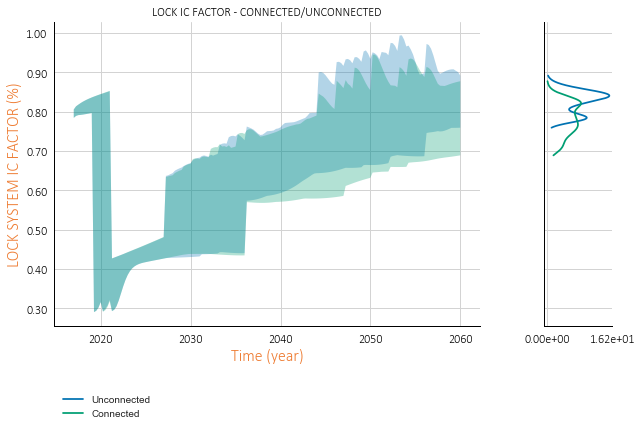

In [42]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LockIC_Connection_Road0Lock0_0_envelopes.png', dpi=300)

Road System IC Factor

Unconnected
Connected
Road System IC Factor


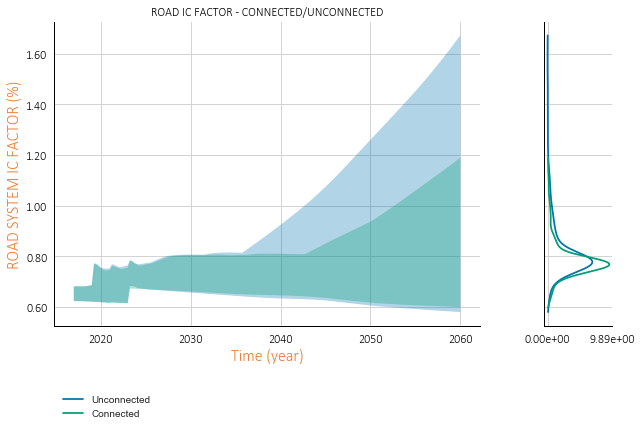

In [43]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_RoadIC_Connection_Road0Lock0_0_envelopes.png', dpi=300)

MTPA Distributed in Harbour

Unconnected
Connected
MTPA Distributed in Harbour


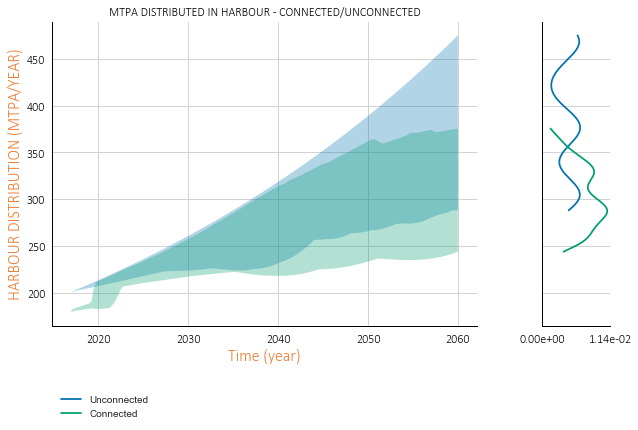

In [44]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_HarbourDist_Connection_Road0Lock0_0_envelopes.png', dpi=300)

Local Economy

Unconnected
Connected
Local Economy


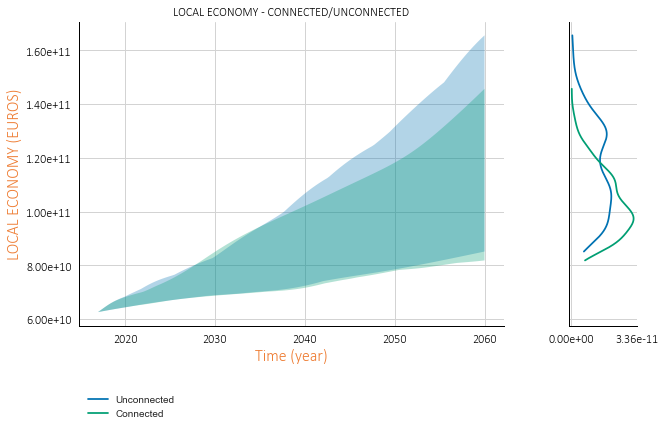

In [45]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = envelopes(results, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LocalEco_Connection_Road0Lock0_0_envelopes.png', dpi=300)

## RoadIntervention

# Road 'Best' Intervention
# No Lock Intervention

#Load Results File

In [46]:
file_name = wd + '\\DUO_1000runs_SimulationFile_RoadXLock0.tar.gz'
results1 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\DUO_1000runs_SimulationFile_RoadXLock0.tar.gz


Lock System IC Factor

Unconnected
Connected
Lock System IC Factor


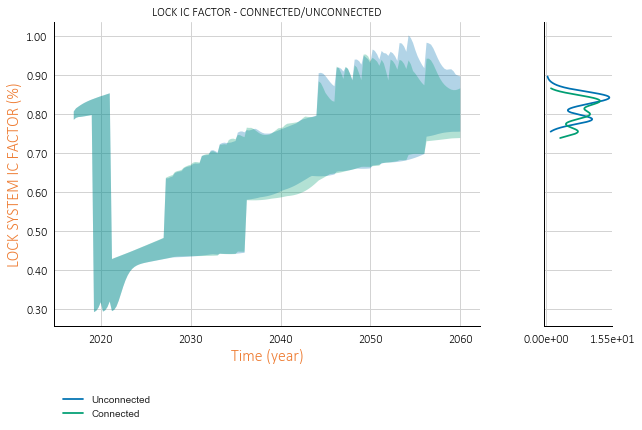

In [47]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = envelopes(results1, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LockIC_Connection_RoadXLock0_0_envelopes.png', dpi=300)

Road System IC Factor

Unconnected
Connected
Road System IC Factor


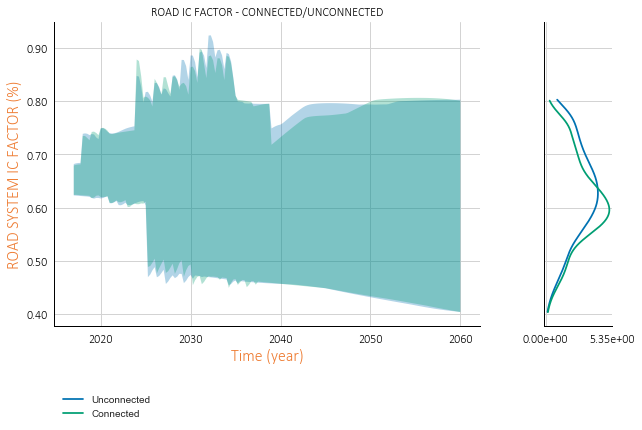

In [48]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = envelopes(results1, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_RoadIC_Connection_RoadXLock0_0_envelopes.png', dpi=300)

MTPA Distributed in Harbour

Unconnected
Connected
MTPA Distributed in Harbour


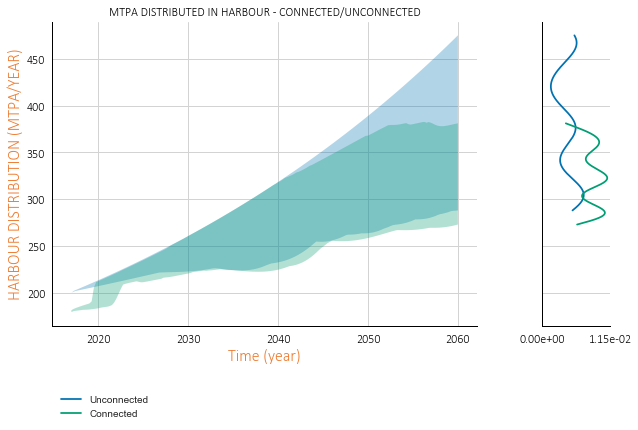

In [49]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = envelopes(results1, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_HarbourDist_Connection_RoadXLock0_0_envelopes.png', dpi=300)

Local Economy

Unconnected
Connected
Local Economy


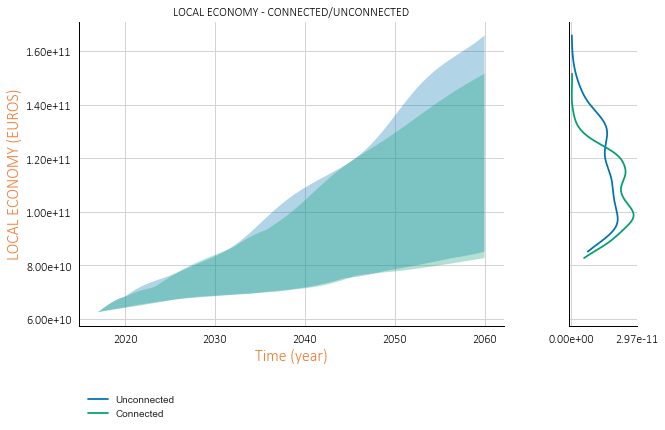

In [50]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = envelopes(results1, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LocalEco_Connection_RoadXLock0_0_envelopes.png', dpi=300)

## LockIntervention

# No Road Intervention
# Lock 'Best' Intervention

#Load Results File

In [51]:
file_name = wd + '\\DUO_1000runs_SimulationFile_Road0LockX.tar.gz'
results2 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\DUO_1000runs_SimulationFile_Road0LockX.tar.gz


Lock System IC Factor

Unconnected
Connected
Lock System IC Factor


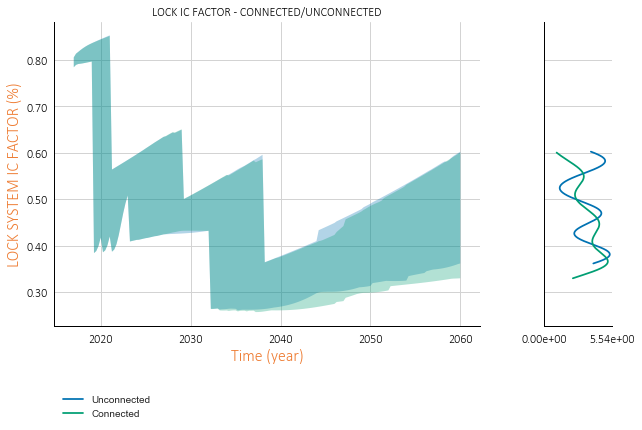

In [52]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = envelopes(results2, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LockIC_Connection_Road0LockX_0_envelopes.png', dpi=300)

Road System IC Factor

Unconnected
Connected
Road System IC Factor


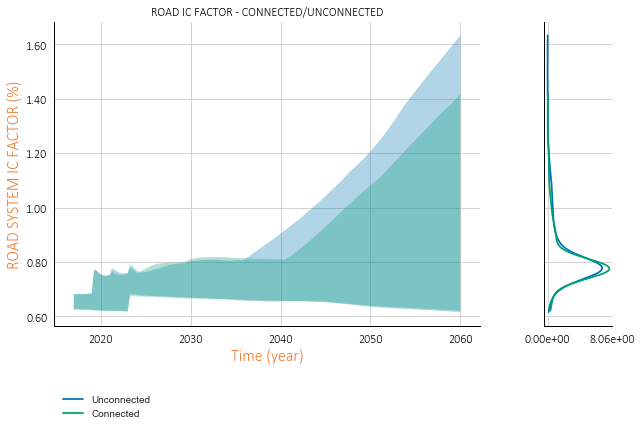

In [53]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = envelopes(results2, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_RoadIC_Connection_Road0LockX_0_envelopes.png', dpi=300)

MTPA Distributed in Harbour

Unconnected
Connected
MTPA Distributed in Harbour


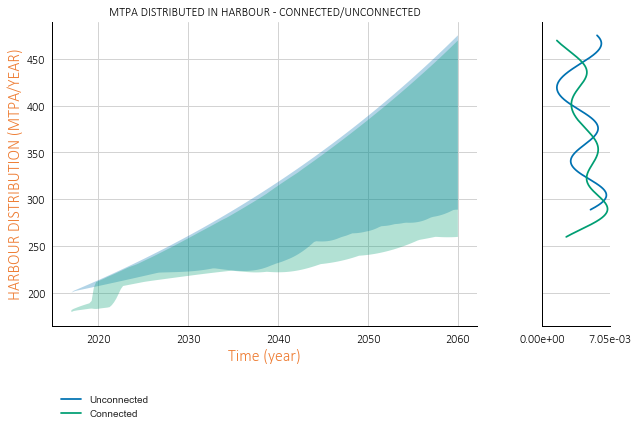

In [54]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = envelopes(results2, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_HarbourDist_Connection_Road0LockX_0_envelopes.png', dpi=300)

Local Economy

Unconnected
Connected
Local Economy


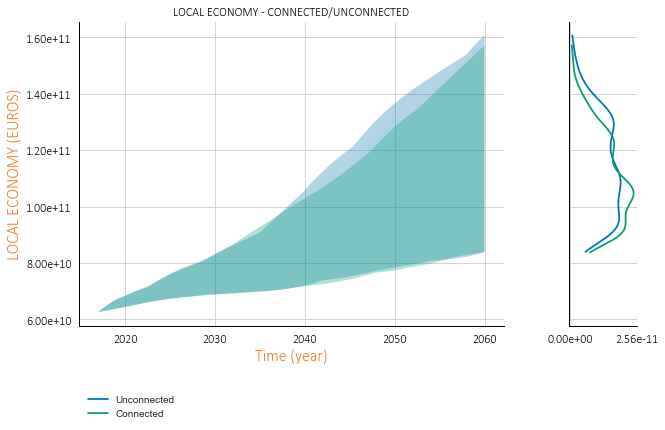

In [55]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = envelopes(results2, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LocalEco_Connection_Road0LockX_0_envelopes.png', dpi=300)

## LockRoadIntervention

# Road 'Best' Intervention
# Lock 'Best' Intervention

#Load Results File

In [56]:
file_name = wd + '\\DUO_1000runs_SimulationFile_RoadXLockX.tar.gz'
results3 = util.load_results(file_name)

[MainProcess/INFO] results loaded succesfully from C:\Users\markh\Dropbox\Tu Delft\Afstuderen SD\V - EMA\DUO_1000runs_SimulationFile_RoadXLockX.tar.gz


Lock System IC Factor

Unconnected
Connected
Lock System IC Factor


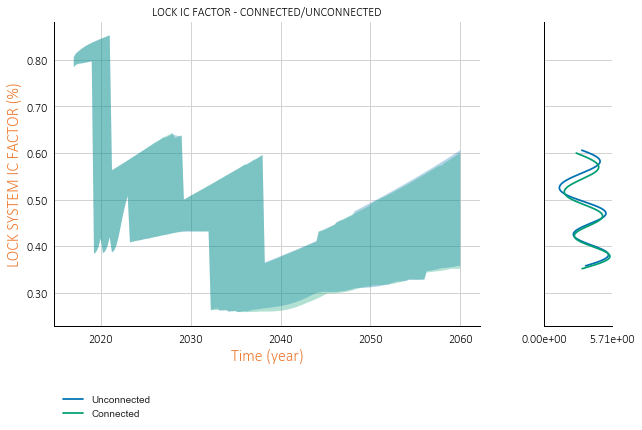

In [57]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Lock System IC Factor'
fig, axes = envelopes(results3, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Lock IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LockIC_Connection_RoadXLockX_0_envelopes.png', dpi=300)

Road System IC Factor

Unconnected
Connected
Road System IC Factor


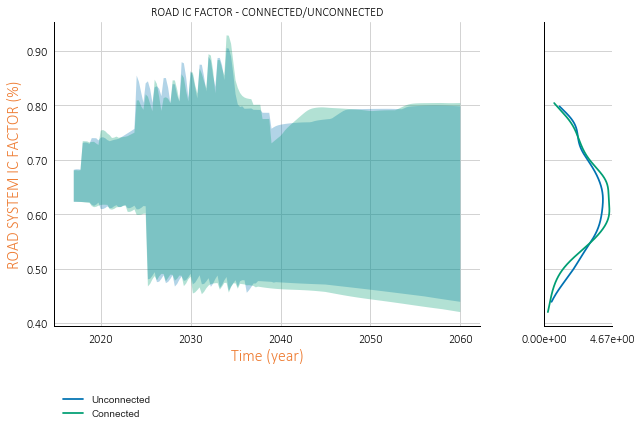

In [58]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Road System IC Factor'
fig, axes = envelopes(results3, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Road IC Factor - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_RoadIC_Connection_RoadXLockX_0_envelopes.png', dpi=300)

MTPA Distributed in Harbour

Unconnected
Connected
MTPA Distributed in Harbour


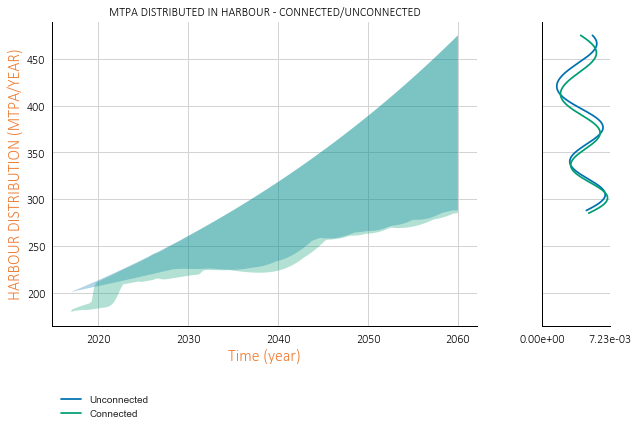

In [59]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'MTPA Distributed in Harbour'
fig, axes = envelopes(results3, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('MTPA Distributed in Harbour - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_HarbourDist_Connection_RoadXLockX_0_envelopes.png', dpi=300)

Local Economy

Unconnected
Connected
Local Economy


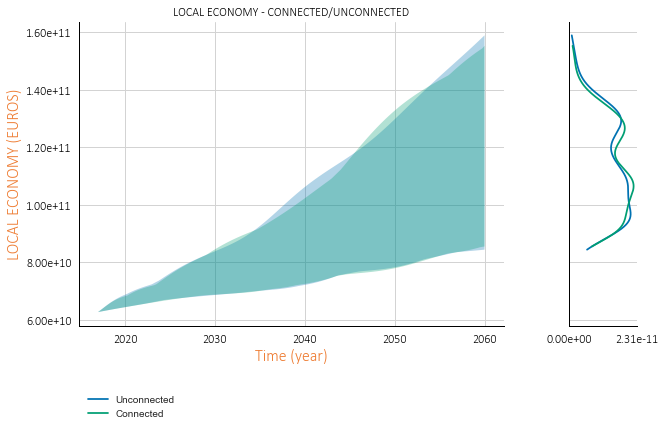

In [60]:
sns.set_style("whitegrid", {"axes.edgecolor": 'Black', "grid.color": 'LightGrey'})

legend = True
outcome = 'Local Economy'
fig, axes = envelopes(results3, 
                  outcomes_to_show=outcome, 
                  group_by='Switch Connected and Unconnected',
                  density='kde', 
                  legend=legend, 
                  figsize=fig_size,
                  categories_labels=Categories_labels_con,
                  fill = True
                  )
ax = axes[outcome]
ax_d = axes[outcome+"_density"]
change_fig_appearance(fig, ylabel=ylabels[outcome], ax_d=ax_d, legend=legend)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax_d.xaxis.set_major_formatter(FormatStrFormatter('%.2e'))
ax.set_title(string_to_upper_case('Local Economy - Connected/Unconnected'), color='Black')

if save:
    plt.savefig( wd1 + '\\20170828_1000runs_DUOAnalysis_LocalEco_Connection_RoadXLockX_0_envelopes.png', dpi=300)